In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.linalg import hilbert, solve, norm
from numpy import matrix, sqrt
from copy import copy
np.random.seed(10)

In [2]:
def solve_iteration(a, b, epsilon):
    n = a.shape[0]
    alpha = matrix(np.zeros((n, n)))
    beta = matrix(np.zeros((n, 1)))
    for i in range(n):
        beta[i, 0] = b[i, 0] / a[i, i]
        for j in range(n):
            if i != j:
                alpha[i, j] = - a[i,j] / a[i,i]
    x = copy(beta)
    iteration = 0
    condition = True
    while condition:
        x_temp = copy(x)
        x = beta + alpha * x
        iteration += 1
        condition = norm(x - x_temp) > epsilon
    return x, iteration


def solve_Seidel(a, b, epsilon):
    n = a.shape[0]
    l = matrix(np.zeros((n, n)))
    r = matrix(np.zeros((n, n)))
    d = matrix(np.zeros((n, n)))
    for i in range(n):
        d[i, i] = a[i, i]
        for j in range(n):
            if i < j:
                r[i, j] = a[i, j]
            elif i > j:
                l[i, j] = a[i, j]
    m = (d+l).getI()
    x = matrix(np.zeros((n, 1)))
    iteration = 0
    condition = True
    while condition:
        x_temp = copy(x)
        x = -m*r*x_temp + m*b
        iteration += 1
        condition = norm(x - x_temp) > epsilon
    return x, iteration

In [3]:
def test(a, eps=-10):
    n = a.shape[0]
    x = matrix(np.ones((n, 1)))
    b = a * x
    res = []
    for e in range(-2, -10, -1):
        res.append((10**e, solve_Seidel(a, b, 10**e)[1], solve_iteration(a, b, 10**e)[1]))
    return res

In [4]:
m1 = np.matrix('-400.60 199.80; 1198.80 -600.40')  # Первый вариант матрицы из методички Пакулиной
m2 = np.matrix(hilbert(2))
res1 = test(m1)
res2 = test(m2)
print("Зависимость  количества итераций от epsilon")
print("1-й матрица из Пакулиной")
print('\n\n{:<8}{:<12}{:<7}'.format('epsilon', 'Метод Зейделя', 'Метод итераций'))
for item in res1:
    print('{:<8} {:<12.0f} {:<7}'.format(item[0], item[1], item[2]))
print("Нормы разности (|x-x_method|):")
for i in res1:
    print("0.1alpha", i[0], '\nalpha', i[1], '\n10alpha', i[2])

Зависимость  количества итераций от epsilon
1-й матрица из Пакулиной


epsilon Метод ЗейделяМетод итераций
0.01     2            2264   
0.001    370          3370   
0.0001   923          4474   
1e-05    1476         5580   
1e-06    2028         6686   
1e-07    2581         7790   
1e-08    3134         8896   
1e-09    3686         10002  
Нормы разности (|x-x_method|):
0.1alpha 0.01 
alpha 2 
10alpha 2264
0.1alpha 0.001 
alpha 370 
10alpha 3370
0.1alpha 0.0001 
alpha 923 
10alpha 4474
0.1alpha 1e-05 
alpha 1476 
10alpha 5580
0.1alpha 1e-06 
alpha 2028 
10alpha 6686
0.1alpha 1e-07 
alpha 2581 
10alpha 7790
0.1alpha 1e-08 
alpha 3134 
10alpha 8896
0.1alpha 1e-09 
alpha 3686 
10alpha 10002


Text(0.5, 1.0, 'Матрица из Пакулиной')

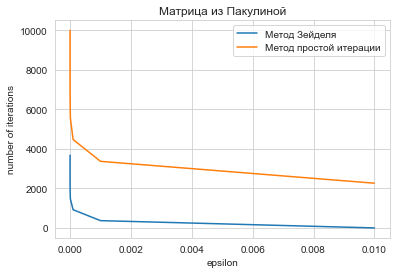

In [15]:
plt.plot([i[0] for i in res1], [i[1] for i in res1])
sns.set_style("whitegrid")
plt.plot([i[0] for i in res1], [i[2] for i in res1])
plt.legend(['Метод Зейделя', "Метод простой итерации"])
plt.xlabel('epsilon')
plt.ylabel('number of iterations')
plt.title('Матрица из Пакулиной')

Text(0.5, 1.0, 'Матрица Гильберта 2-го порядка')

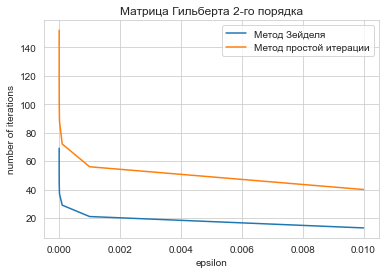

In [16]:
plt.plot([i[0] for i in res2], [i[1] for i in res2])
sns.set_style("whitegrid")
plt.plot([i[0] for i in res2], [i[2] for i in res2])
plt.legend(['Метод Зейделя', "Метод простой итерации"])
plt.xlabel('epsilon')
plt.ylabel('number of iterations')
plt.title('Матрица Гильберта 2-го порядка')

In [7]:
n = 1000
m = matrix(np.random.rand(n, n))
for i in range(n):
    m[i, i] = sum([abs(m[i, j]) for j in range(n)])

In [9]:
res3 = test(m)

In [10]:
print("Зависимость  количества итераций от epsilon")
print("Матрица 1000х1000 со строгим диагональным преобладанием")
print('\n\n{:<8}{:<12}{:<7}'.format('epsilon', 'Метод Зейделя', 'Метод итераций'))
for item in res3:
    print('{:<8} {:<12.0f} {:<7}'.format(item[0], item[1], item[2]))

Зависимость  количества итераций от epsilon
Матрица 1000х1000 со строгим диагональным преобладанием


epsilon Метод ЗейделяМетод итераций
0.01     7            8695   
0.001    8            10983  
0.0001   10           13271  
1e-05    12           15558  
1e-06    13           17846  
1e-07    14           20134  
1e-08    16           22421  
1e-09    18           24709  
